In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

crime_df = pd.read_csv("USArrests.csv")

crime_df.head()

C:\Users\toriw\AppData\Local\Temp\ipykernel_26832\1538585173.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Clustering

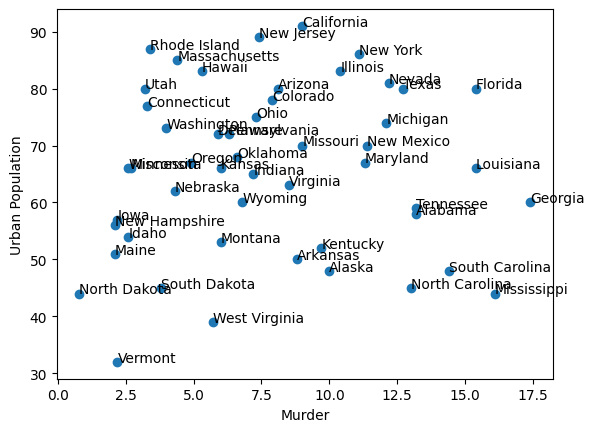

In [2]:
from sklearn.cluster import KMeans
X = crime_df.drop('State',axis =1)
y = crime_df["State"]

plt.scatter(X['Murder'],X['UrbanPop'])
#enumerating allows you to keep track of the 
#index associate with each iteration
for  i, txt in enumerate(y): 
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))

plt.xlabel('Murder')
plt.ylabel('Urban Population')
plt.show()

In [3]:
inertias = []
distortions = []

for k in range(1,10):
    # build and fit the model
    model = KMeans(n_clusters=k).fit(X)

    # Distortion is the average of the 
    # squared distance from the cluster center
    # to the data points in Euclidean space
    # Euclidean space = standard 2+ dimensional space

    distortion = sum(np.min(cdist(X, model.cluster_centers_,
                                  'euclidean'), axis=1))
    distortions.append(distortion)

    #inertia is calculated by measuring the distance 

    inertia = model.inertia_
    inertias.append(inertia)

In [ ]:
plt.plot(range(1,10), distortions)